In [ ]:
#pip install opencv-python

In [4]:
from PIL import Image
import cv2
import numpy as np
import requests

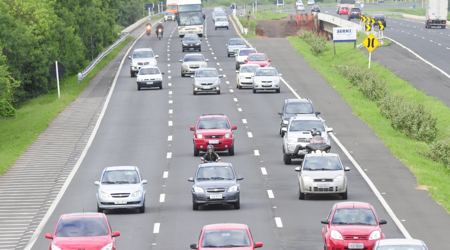

In [14]:
image = Image.open(requests.get("https://conteudo.imguol.com.br/2012/12/29/29dez2012--desde-o-inico-da-manha-deste-sabado-e-intenso-o-trafego-de-veiculos-no-sentido-litoral-pela-freeway-em-porto-alegre-rs-a-previsao-da-concessionaria-concepa-que-administra-a-rodovia-e-de-1356782162691_956x500.jpg",stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

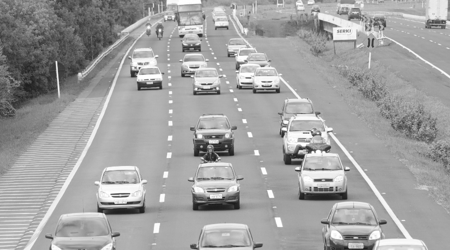

In [16]:
cinza = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(cinza)

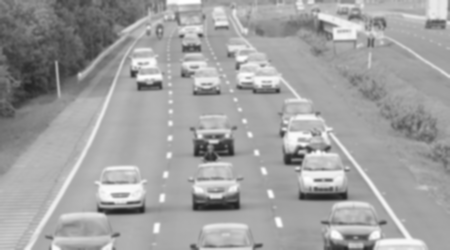

In [18]:
blur = cv2.GaussianBlur(cinza,(5,5),0)
Image.fromarray(blur)

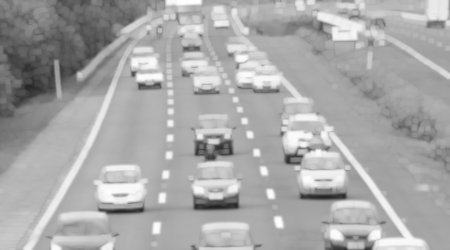

In [19]:
dilated = cv2.dilate(blur, np.ones((3,3)))
Image.fromarray(dilated)

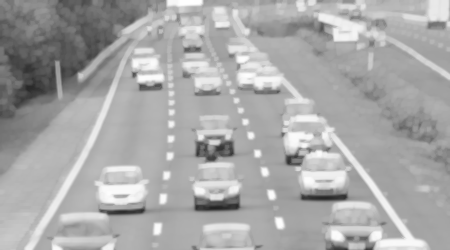

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [21]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[374, 211,  37,  37],
       [125,  58,  47,  47],
       [245,  63,  46,  46],
       [184,  64,  47,  47],
       [179, 157,  75,  75],
       [ 48, 152,  64,  64],
       [ 92, 168,  68,  68],
       [279, 144,  81,  81],
       [ 70,  74,  96,  96],
       [ 33, 202,  43,  43],
       [178,  30,  30,  30],
       [ 94, 152,  48,  48],
       [101,  36,  79,  79],
       [169,  52,  37,  37]])

14  cars found


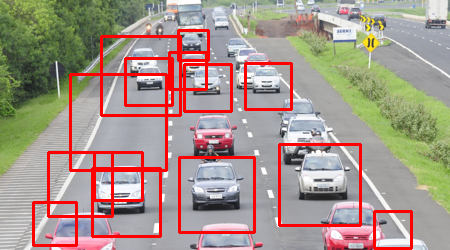

In [22]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)